In [10]:
import pandas as pd
from pandas import DataFrame as df
import numpy as np
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
#Read In
train = pd.read_csv(r"C:\Users\hfallah\OneDrive - Itron\Desktop\all\train.csv")
data = train.iloc[:,1:].values
label = train.iloc[:,:1].values

In [3]:
#Split to train test
train_data, test_data, train_label, test_label = train_test_split(data, label, test_size=0.5, random_state=0)

In [16]:
#Data Exploration - One row = one image.
#One variation of digit '1'.
matrix = train.iloc[0,1:].values.reshape((28,28))
Image.fromarray(matrix.astype(np.uint8))

In [17]:
#Second variation of digit '1'.
matrix = train.iloc[2,1:].values.reshape((28,28))
Image.fromarray(matrix.astype(np.uint8))

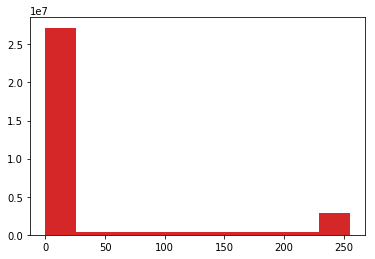

In [7]:
#Data Exploration - Histogram of pixel values
plt.hist(np.reshape(data,(32928000,1)))
plt.show()

In [18]:
#Data Exploration - Distribution of Digit Frequency
pd.DataFrame(label)[0].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: 0, dtype: int64

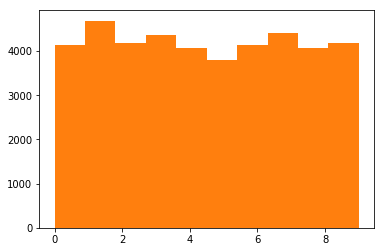

In [20]:
#Data Exploration - Distribution of Digit Frequency
plt.hist(label)
plt.show()

In [22]:
#Model 1
def numAccuracy(train_data, test_data, test_label, numComponents, maxDepth):
    pca = PCA(n_components=numComponents)
    
    pca.fit(train_data)
    pca_matrix_train=pca.transform(train_data)
    pca_matrix_test=pca.transform(test_data)

    clf = tree.DecisionTreeClassifier(max_depth=maxDepth)
    clf = clf.fit(pca_matrix_train, train_label)
    predict = clf.predict(pca_matrix_test)


    #check if model is correct against actuals
    check_table=pd.DataFrame(predict, columns=['Predicted'])
    test_label = pd.DataFrame(test_label).reset_index(drop=True)
    check_table2 = check_table.join(test_label)
    check_table2.columns=['Predicted', 'Actual']
    check_table2['match'] = (check_table2['Predicted']==check_table2['Actual'])
    
    acc = check_table2['match'].sum()*1.0/check_table2['match'].count()
    return acc

#Check model accuracy
import itertools
Components = [10,20,50,100,200,400]
Depth = [5,25,100,200,500]
Results = list(itertools.product(Components, Depth))
Results = pd.DataFrame(Results, columns=['Components','Depth'])
y = [numAccuracy(train_data, test_data, test_label, num, num2) for num in Components for num2 in Depth]
Results['Accuracy']= pd.DataFrame(y)
Results

,Components,Depth,Accuracy
0,10,5,0.626762
1,10,25,0.799476
2,10,100,0.795429
3,10,200,0.796429
4,10,500,0.796095
5,20,5,0.627143
6,20,25,0.820429
7,20,100,0.821714
8,20,200,0.822667
9,20,500,0.823238


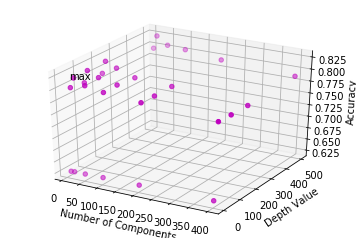

In [32]:
#Scatter Plot of Results
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter(Results['Components'], Results['Depth'], Results['Accuracy'],c='m', marker='o')
ax.set_xlabel('Number of Components')
ax.set_ylabel('Depth Value')
ax.set_zlabel('Accuracy')
ymax = max(Results['Accuracy'])
xpos = y.index(ymax)
xmax = Results['Components'][xpos]
xmax2 = Results['Depth'][xpos]

ax.text(xmax, ymax, zmax, 'max')
plt.show()

In [ ]:
#Model 2
def numAccuracy2(train_data, test_data, test_label, numComponents):
    pca = PCA(n_components=numComponents)
    
    pca.fit(train_data)
    pca_matrix_train=pca.transform(train_data)
    pca_matrix_test=pca.transform(test_data)

    logisticRegr = LogisticRegression(solver = 'lbfgs')
    logisticRegr.fit(pca_matrix_train, train_label)
    logisticRegr.predict(pca_matrix_test)


    #check if model is correct against actuals
    score = logisticRegr.score(pca_matrix_test, test_label)
    return score

#Check model accuracy
x = [1,50,100,150,200,250,300,350,400,450,500,550,600]
y = [numAccuracy2(train_data, test_data, test_label.values.ravel(), num) for num in x]

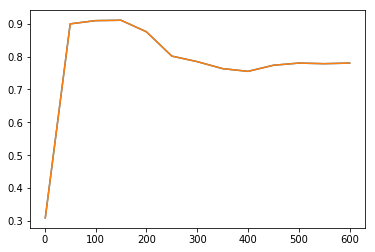

In [38]:
plt.plot(x,y)
plt.show()

In [ ]:
#Produce Results on Test Dataset using Model 2
test=pd.read_csv(r"C:\Users\hfallah\OneDrive - Itron\Desktop\all\test.csv")
data=train.iloc[:,1:].values
label=train.iloc[:,:1].values

pca = PCA(n_components=250)

pca.fit(train)
pca_matrix_train=pca.transform(train)
pca_matrix_test=pca.transform(test)

logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(pca_matrix_train, label)
result=logisticRegr.predict(pca_matrix_test)


result=pd.DataFrame(result, columns=['Predicted'])
result = result.join(pd.DataFrame(test))
result.to_csv(r"C:\Users\hfallah\OneDrive - Itron\Desktop\all\Result.csv")